<a href="https://colab.research.google.com/github/Petik99/kepfel/blob/main/Labor6_KF_IKM_GL_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurális hálók

A mostani gyakorlat/labor témája egyszerű neurális hálók tanítása lesz a PyTorch függvénykönyvtár segítségével.

## GPU és CUDA ellenőrzése

A !nvcc --version parancs segítségével ellenőrizhető a CUDA verziója

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


## Fontos könyvtárak installálása

Torch, torchvision

In [3]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## PyTorch és CUDA ellenőrzése

In [4]:
import torch
print(torch.cuda.is_available())

True


## Segédfüggvény, hogy legyen progress bar

In [ ]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

## Számítási gráf numpy segítségével



In [5]:
import numpy as np
from numpy.random import randn

np.random.seed(42)

a = randn(2)
b = randn(2)
c = randn(2)

d = 2*a + 0.5*b
e = c*d
f = np.sum(e)
print(f)

grad_fe = np.ones(2)
grad_ec = grad_fe * d
grad_ed = grad_fe*c
grad_a = grad_ed*2
grad_b = grad_ed*0.5

print(grad_a)
print(grad_b)
print(grad_ec)

-0.42199704138300664
[-0.46830675 -0.46827391]
[-0.11707669 -0.11706848]
[1.31727258 0.48498633]


## Számítási gráf PyTorch segítségével

In [6]:
import torch

np.random.seed(42)
torch.manual_seed(42)

a = torch.tensor(randn(2), requires_grad=True)
b = torch.tensor(randn(2), requires_grad=True)
c = torch.tensor(randn(2), requires_grad=True)

d = 2*a + 0.5*b
e = c*d
f = e.sum()
print(f)

f.backward()

print(a.grad)
print(b.grad)
print(c.grad)

tensor(-0.4220, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor([-0.4683, -0.4683], dtype=torch.float64)
tensor([-0.1171, -0.1171], dtype=torch.float64)
tensor([1.3173, 0.4850], dtype=torch.float64)


## Lineáris modell definiálása

In [9]:
from torch import nn

class Linear(nn.Module):
  def __init__(self, N_in, N_out):
     super(Linear, self).__init__()

     self.W = torch.randn((N_out, N_in), requires_grad=True)

  def forward(self, input):
    return torch.addmv(torch.zeros(2), self.W, input)

torch.manual_seed(42)
neuron = Linear(128, 2)
x= torch.randn(128)
y=neuron(x)
print(y)

tensor([ -4.9931, -21.6903], grad_fn=<AddmvBackward0>)


## Lineáris modell tanítása

tensor(0.0729, grad_fn=<NormBackward1>)
349.3480259180069
2.490078654838726


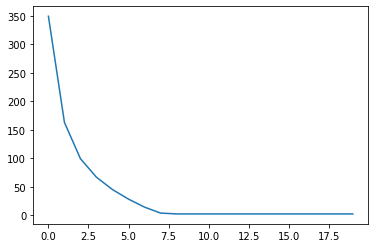

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

torch.manual_seed(42)
N_in = 128
N_out = 2
N_d = 128

neuron = Linear(N_in, N_out)

x_train = torch.randn(N_d, N_in)
y_train = torch.randn(N_d, N_out)

lr = 1e-3

losses = []
num_epochs=20

for i in range(num_epochs):
  running_loss = 0
  for x, y in zip(x_train, y_train):
    y_pred = neuron(x)
    loss = ((y-y_pred)**2).sum() + 10*neuron.W.norm(2)
    loss.backward()
    with torch.no_grad():
      neuron.W -= lr*neuron.W.grad
      neuron.W.grad.zero_()
    running_loss += loss.item()

  losses.append(running_loss/N_d)

print(neuron.W.norm(2))
print(losses[0])
print(losses[-1])

plt.plot(losses); plt.show()

## Beépített függvények használata

In [12]:
class MLP(nn.Module):
  def __init__(self, N_in, N_out, N_hidden):
     super(MLP, self).__init__()
     self.L1 = nn.Linear(N_in, N_hidden)
     self.L2 = nn.Linear(N_hidden, N_out)
  
  def forward(self, input):
    x = self.L1(input)
    x = self.L1(x)
    return x

torch.manual_seed(42)

net = MLP(128, 2, 128)
x = torch.randn(128)
y = net(x)
print(y)

tensor([-0.3434, -0.1750, -0.3334,  0.1005,  0.2382, -0.0517, -0.1288,  0.4264,
        -0.2938, -0.2898, -0.0263,  0.2159,  0.0362, -0.3538,  0.1721, -0.1598,
         0.2371,  0.6529,  0.6081, -0.0104, -0.0103, -0.5873,  0.2122, -0.5158,
         0.3484, -0.0072,  0.0339, -0.5651,  0.2976, -0.0178,  0.0189, -0.2155,
        -0.5944,  0.4357, -0.6835,  0.2577,  0.2862, -0.6443, -0.7891,  0.4115,
         0.3357, -0.1703, -0.6173, -0.5341, -0.3785, -0.4082,  1.1818,  0.2254,
         0.1809, -0.7046, -0.3006, -0.5170, -0.1300,  0.1496, -0.8025, -0.1881,
        -0.2431,  0.6869,  0.3218,  0.0607,  0.5865, -0.1196,  0.2888,  0.3073,
        -0.5375, -0.2395, -0.3598,  0.7544, -0.1535, -0.3439, -0.6296, -0.4612,
        -0.0754, -0.2221, -0.0753,  0.3647, -0.3783,  0.6911,  0.5373,  0.7925,
        -0.8235,  0.1133,  0.6510,  0.3704, -0.2226, -0.1304,  0.2012,  0.9008,
         0.4571,  0.0251, -0.5852,  0.7551,  0.1819,  0.2270, -0.6323,  0.5838,
         0.2179,  0.2643,  0.0070,  0.18

## Tanítás beépített függvényekkel

In [13]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

N_hidden = 256

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=4)

net = MLP(128, 2, N_hidden)

optimiser = optim.SGD(net.parameters(), lr=1e-2, weight_decay = 1e-5)
loss_fn = nn.MSELoss()

losses = []
num_epochs=1000
best_loss = 10000

for i in range(num_epochs):
  running_loss = 0
  #for batch(x, y) in enumerate(dataloader):
  for x, y in dataloader:
    optimiser.zero_grad()
    y_pred = net(x)
    loss = loss_fn(y, y_pred)
    running_loss += loss.item()

  running_loss /= len(dataloader)
  losses.append(running_loss)
  if(running_loss<best_loss):
    best_loss = running_loss
    torch.save(net.state_dict, "best_network.pth")

print(best_loss)

plt.plot(losses); plt.show()

RuntimeError: ignored

## Tanítás CUDA segítségével

## Validáció

## Önálló feladat: Értelmes adat tanítása

Próbáld meg az y = x^3 függvényt betanítani a hálónak! A hálónak legyen 3 be és 3 kimenete, ezek között kelljen neki megvalóítani a függvényt. Vizsgáld meg hogyan változik a tanítás a különböző paraméterek változtatásának hatására:

*   Learning rate
*   Adj hozzá véletlen zajt a kimenethez (mindkettőhöz, próbálj ki 2-3 különböző nagyságú zajt)
*   A háló neuronszáma

A beadandó pdf jegyzőkönyvben értékeld az egyes megoldások közti különbségeket!













In [ ]:
Nin = 2
Nout = 2
  